## STL

Quick example of using STL on Augur Data. This is written in R and depends on the packages in cell 1

We're going to use the `prophet` library from Facebook here because it's very quick to set up, and because it has a Python variant. See [the Prophet docs](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html) for details.

In [1]:
# Load required libraries
library(tidyverse)
library(dbplyr)
library(lubridate)
library(RPostgreSQL)
library(prophet)
library(config)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union

In [2]:
# Get the data from Augur

m   <- DBI::dbDriver("PostgreSQL")
con <- DBI::dbConnect(m,
                      user=config::get('user'),
                      password=config::get('password'),
                      dbname=config::get('database'),
                      host=config::get('host')
)

augur_id <- con %>%
  tbl(in_schema("augur_data", "repo")) %>%
  filter(repo_name == 'augur') %>%
  pull(repo_id)
augur_id

con %>%
  tbl(in_schema("augur_data", "commits")) %>%
  filter(repo_id == augur_id) %>% collect() -> r
head(r)

[1] 25440

cmt_id,repo_id,cmt_commit_hash,cmt_author_name,cmt_author_raw_email,cmt_author_email,cmt_author_date,cmt_author_affiliation,cmt_committer_name,cmt_committer_raw_email,⋯,cmt_date_attempted,cmt_ght_author_id,cmt_ght_committer_id,cmt_ght_committed_at,tool_source,tool_version,data_source,data_collection_date,cmt_author_timestamp,cmt_committer_timestamp
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dttm>,<int>,<int>,<dttm>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>
34601289,25440,fdd0995e786fc56f5bcec1b6382950b14a2259a7,mrsaicharan1,saicharan.reddy1@gmail.com,saicharan.reddy1@gmail.com,2020-05-31,Google Summer of Code,mrsaicharan1,saicharan.reddy1@gmail.com,⋯,2020-06-01,280550,NA,NA,'Facade Worker','1.0.1','Git Log',2020-07-13 13:39:25,2020-05-31 18:44:01,2020-06-01 16:19:54
34686121,25440,319e8c533db34c78bf64a03cd86bb8ecdf2be0e0,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,61482022+ABrain7710@users.noreply.github.com,2021-08-19,CHAOSS Community,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,⋯,2021-08-19,1,NA,NA,'Facade Worker','1.0.1','Git Log',2021-09-08 15:36:07,2021-08-19 19:05:58,2021-08-19 19:05:58
34685783,25440,104a805492aafae994b614c947dd3b6ec9bad0e7,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,61482022+ABrain7710@users.noreply.github.com,2021-08-04,CHAOSS Community,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,⋯,2021-08-04,1,NA,NA,'Facade Worker','1.0.1','Git Log',2021-09-08 15:36:03,2021-08-04 20:41:58,2021-08-04 20:41:58
34684527,25440,9adc0657f25643d243d9b87de714f59f86b1b1a4,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,61482022+ABrain7710@users.noreply.github.com,2021-04-19,CHAOSS Community,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,⋯,2021-04-19,1,NA,NA,'Facade Worker','1.0.1','Git Log',2021-08-11 22:19:33,2021-04-20 02:45:40,2021-04-20 02:45:40
34684793,25440,8e7b240aecf5502aee6736d74947d7d309cf6838,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,61482022+ABrain7710@users.noreply.github.com,2021-05-20,CHAOSS Community,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,⋯,2021-05-20,1,NA,NA,'Facade Worker','1.0.1','Git Log',2021-08-11 22:19:35,2021-05-20 16:32:07,2021-05-20 16:32:07
34684520,25440,168c3ee591a143ad7d0ffdfb655c9aa5b18134bd,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,61482022+ABrain7710@users.noreply.github.com,2021-05-20,CHAOSS Community,Andrew Brain,61482022+ABrain7710@users.noreply.github.com,⋯,2021-05-20,1,NA,NA,'Facade Worker','1.0.1','Git Log',2021-08-11 22:19:33,2021-05-20 17:06:33,2021-05-20 17:06:33


STL takes the raw time-series and decomposes it, accounting for seasonality and potentially other regressors such as holiday dates, etc. Here I will add day-of-year and day-of-week, but no regressors:

In [3]:
df <- r %>%
  group_by(cmt_commit_hash) %>%                  # cmt_commit_hash may have many files etc
  summarise(ds = first(cmt_author_date)) %>%     # just get the date of the commit
  mutate(ds   = ymd(ds),                         # convert from character string to POSIX time
         week = cut(ds, 'week')) %>%             # Bucket date to the nearest week
    count(ds,name = "y")                         # Count commits in a given week
head(df)

ds,y
<date>,<int>
2017-01-05,1
2017-01-10,5
2017-01-11,1
2017-01-12,1
2017-01-18,4
2017-01-19,1


In [4]:
# Build the Prophet model
m <- prophet(df, daily.seasonality = F, weekly.seasonality = T, yearly.seasonality = T)
# Forecast 1 week ahead (Prophet *requires* a forecast, even though we care about the historical data here, so we make it the minimum)
future <- make_future_dataframe(m, periods = 1)
forecast <- predict(m, future)

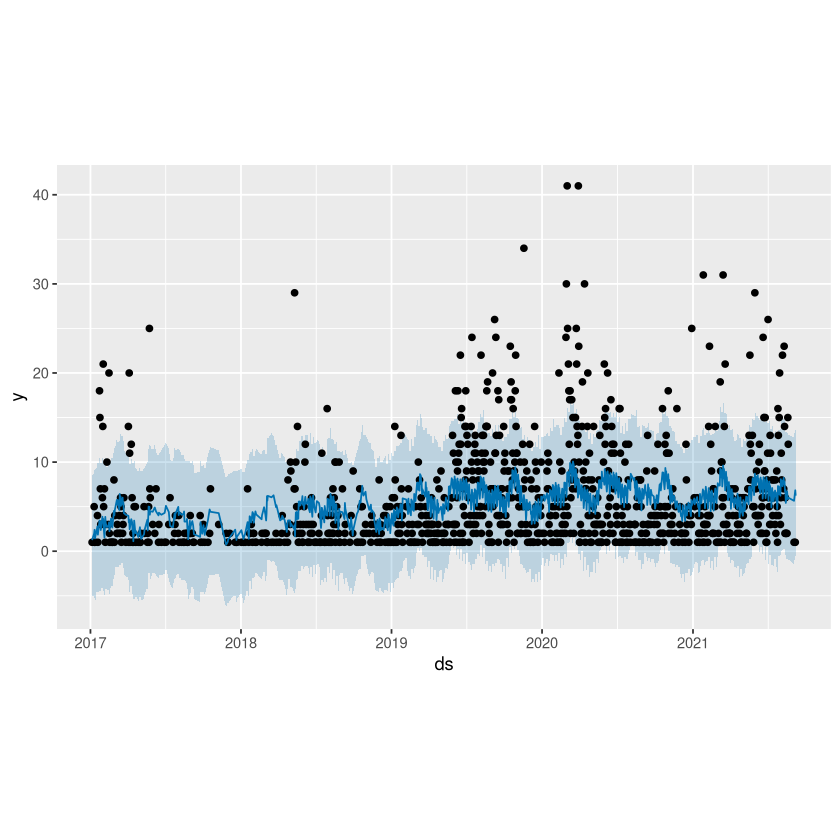

In [5]:
# Plot the model
plot(m, forecast)

The data is very noisy, it's (probably) a zero-inflated count model (negative-binomial or similar) so we get a lot of zeros where no commits happen that week. So the uncertainty is large but the trend seems decent.

Now for the STL :)

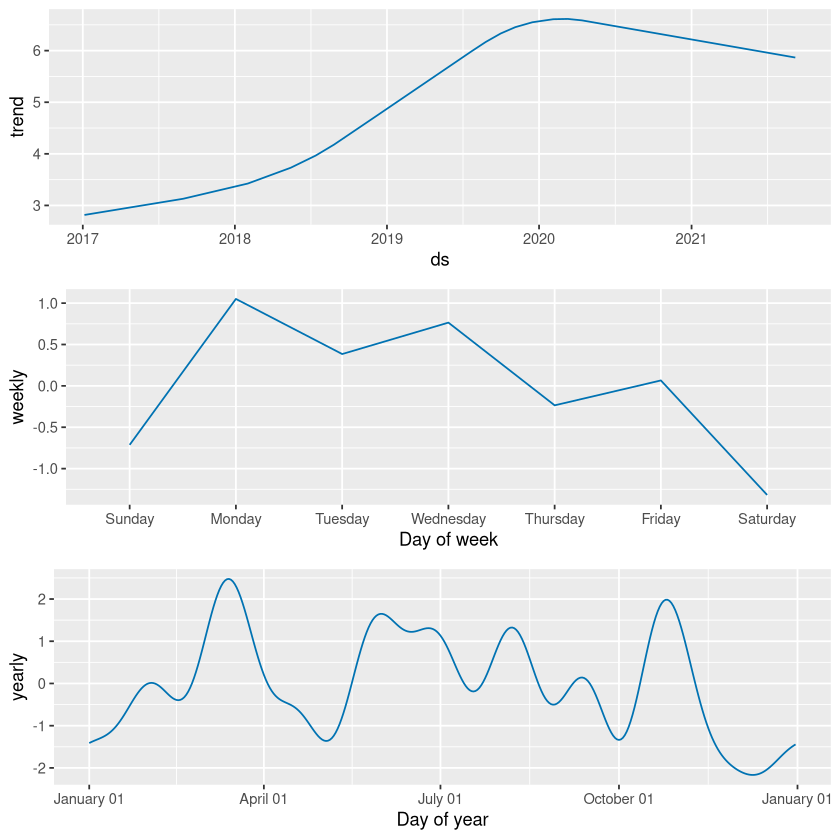

In [6]:
prophet_plot_components(m, forecast)

We could also demonstrate accounting for an effect on commits of US holidays

[1] "New Year's Day"              "New Year's Day (Observed)"  
 [3] "Martin Luther King Jr. Day"  "Washington's Birthday"      
 [5] "Memorial Day"                "Independence Day"           
 [7] "Labor Day"                   "Columbus Day"               
 [9] "Veterans Day (Observed)"     "Veterans Day"               
[11] "Thanksgiving"                "Christmas Day"              
[13] "Independence Day (Observed)" "Christmas Day (Observed)"

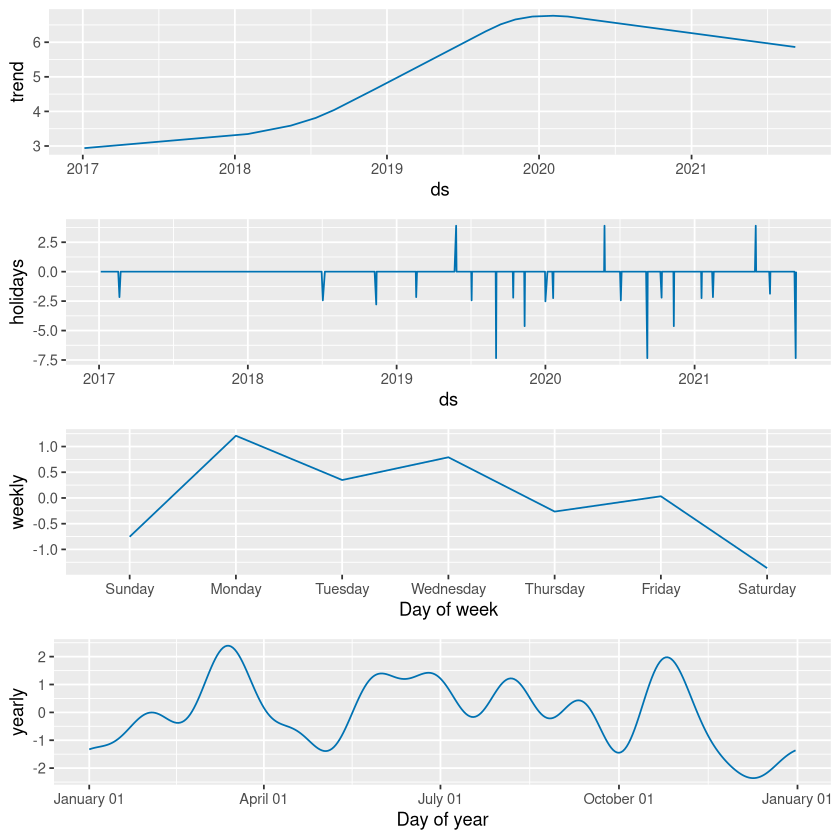

In [7]:
m <- prophet(daily.seasonality = F, weekly.seasonality = T) %>%
  add_country_holidays(country_name='US') %>%
  fit.prophet(df)

m$train.holiday.names

future <- make_future_dataframe(m, periods = 1)
forecast <- predict(m, future)
prophet_plot_components(m, forecast)

This can be useful information to community maintainers. For example, we might observe:
1. That there has been a slight decrease in the commit trend over the last 18 months - this would be hard to observe in the raw data above
2. That holidays don't seem to have a consistent effect, some increase commits, some decrease them (eg Christmas)
3. That commit rates are low on Sat/Sun, indicating perhaps that most contributiors do so on work time?
4. The variation across the year is only +/- 2 commits/week
There are multiple ways this information might be used, from deciding if the drop in commits is appropriate (maturity?), to targeting messages about new releases (not on Sundays) and so forth.